# Milestone 1 - EDA and Preprocessing data 



```
# This is formatted as code
```

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you.
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

We used the parquet technique here

In [ ]:
accidents_df = pd.read_csv("2015_Accidents_UK.csv", index_col="accident_index")

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140056 entries, 201501BS70001 to 2015984141415
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   140056 non-null  int64  
 1   accident_year                                140056 non-null  int64  
 2   accident_reference                           140056 non-null  object 
 3   location_easting_osgr                        140029 non-null  float64
 4   location_northing_osgr                       140029 non-null  float64
 5   longitude                                    140029 non-null  float64
 6   latitude                                     140029 non-null  float64
 7   police_force                                 140056 non-null  object 
 8   accident_severity                            140056 non-null  object 
 9   number_of_vehicles                           

In [4]:
accidents_df.describe()

,Unnamed: 0,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,140056.000000,140056.0,140029.000000,1.400290e+05,140029.000000,140029.000000,140056.000000,140056.000000,140056.000000
mean,70027.500000,2015.0,446913.896086,2.899043e+05,-1.330458,52.496743,1.841014,1.329390,38.175587
std,40430.828988,0.0,94893.264196,1.577932e+05,1.393585,1.420984,0.710046,0.795427,13.903646
min,0.000000,2015.0,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,0.000000
25%,35013.750000,2015.0,385626.000000,1.766380e+05,-2.216068,51.475197,1.000000,1.000000,30.000000
50%,70027.500000,2015.0,451460.000000,2.408860e+05,-1.236156,52.051875,2.000000,1.000000,30.000000
75%,105041.250000,2015.0,526760.000000,3.911840e+05,-0.172506,53.414614,2.000000,1.000000,40.000000
max,140055.000000,2015.0,655282.000000,1.197917e+06,1.758443,60.661117,37.000000,38.000000,70.000000


In [5]:
accidents_df.head()

,Unnamed: 0,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
201501BS70001,0,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002825
201501BS70002,1,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002820
201501BS70004,2,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,Slight,1,...,Zebra,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002833
201501BS70005,3,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002874
201501BS70008,4,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,Serious,2,...,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002814


# 2- EDA

Number of accidents that happened on each weekday

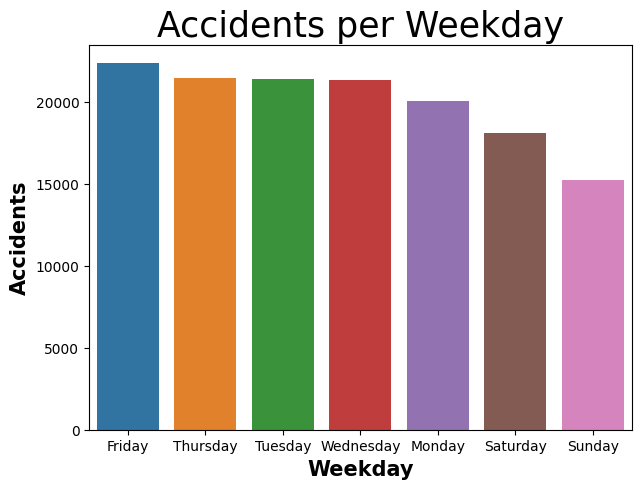

-Most accidents happen on Friday which might be due to people rushing home for the weekend or due to more people going out with friends/family. 

-Least accidents happen on Sunday which might be because people prefer to stay home that day, or 
because a lot of shops close that day or have reduced hours which means less traffic


In [6]:
plt.figure(figsize=(7,5))
bar = sns.countplot(x=accidents_df["day_of_week"], data= accidents_df
                    ,order = accidents_df["day_of_week"].value_counts().index)
plt.title("Accidents per Weekday", fontsize="25")
plt.xlabel("Weekday", weight="bold", fontsize="15")
plt.ylabel("Accidents", weight="bold", fontsize="15")
plt.show()
print("-Most accidents happen on Friday which might be due to people rushing home for the weekend or due to more people going out with friends/family. \n\n\
-Least accidents happen on Sunday which might be because people prefer to stay home that day, or \n\
because a lot of shops close that day or have reduced hours which means less traffic")

Average no. of casualties in each speed limit

We can see that the number of casualties increases when the speed limit is higher this is likely due to the car speed increase leading to a higher risk of injury or death 


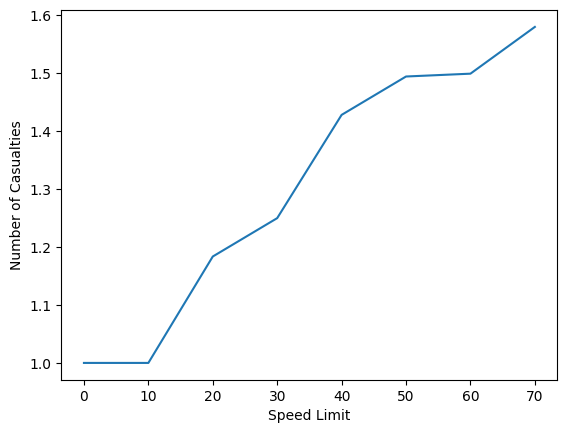

In [7]:
accidents_df.groupby(by="speed_limit")["number_of_casualties"].mean().plot.line(xlabel='Speed Limit',ylabel='Number of Casualties')
print("We can see that the number of casualties increases when the speed limit is higher this is likely due to the car speed increase leading to a higher risk of injury or death ")

Ranking the road types and their accidents on friday nights

Most accidents on fridays nights happen on Single Carriageways


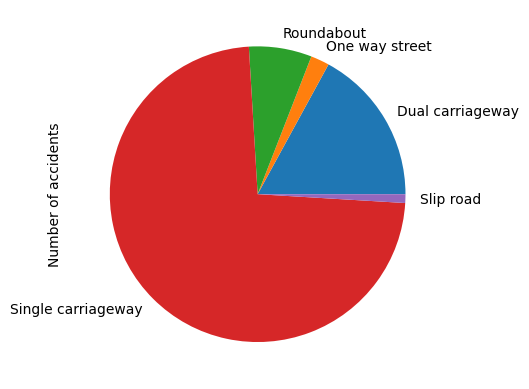

In [8]:
accidents_df[(accidents_df['day_of_week']=='Friday') & (accidents_df['light_conditions']!='Daylight')].groupby('road_type')['light_conditions'].count().plot.pie(ylabel='Number of accidents')
print('Most accidents on fridays nights happen on Single Carriageways')

Percentage of fatal accidents in each road condition

We can see in this bar that the fatalties are very high when there is a flood which is to be expected, and having wet roads can also significantly increase the likely hood of death. The snowy roads lead to the least amount of deaths and that is due to cars having a tougher time driving and are less likely to be going fast.


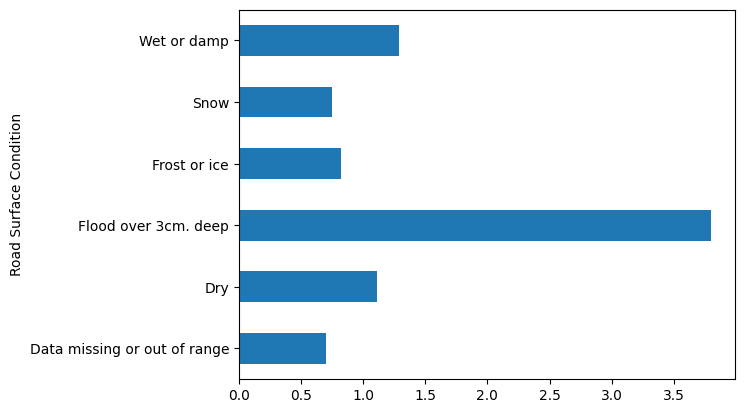

In [9]:
new_df = accidents_df[accidents_df['accident_severity'] == 'Fatal'].groupby("road_surface_conditions")['accident_severity'].count().astype(float)
new_df1 = accidents_df.groupby("road_surface_conditions")['accident_severity'].count().astype("float")
for i in range(0,new_df.size):
  num=(new_df[i]*100)/(new_df1[i])
  new_df1[i]=num.round(2)
new_df1.plot.barh(xlabel="Road Surface Condition")
print("We can see in this bar that the fatalties are very high when there is a flood which is to be expected, and having wet roads can also significantly increase the likely hood of death. The snowy roads lead to the least amount of deaths and that is due to cars having a tougher time driving and are less likely to be going fast.")

Average number of casualties in Urban vs Rural areas

Rural areas have more casualties


<BarContainer object of 2 artists>

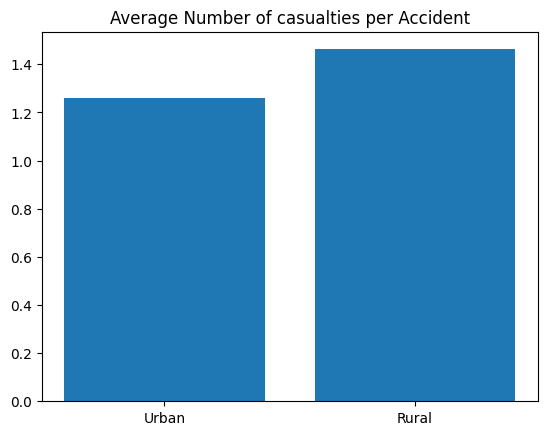

In [10]:
u=accidents_df.number_of_casualties[accidents_df['urban_or_rural_area'] == 'Urban'].mean()
r=accidents_df.number_of_casualties[accidents_df['urban_or_rural_area'] == 'Rural'].mean()
if(u>r):
  print("Urban areas have more casualties")
else:
  print("Rural areas have more casualties")

plt.title('Average Number of casualties per Accident')
plt.bar(["Urban","Rural"],[u,r])


# 3 - Cleaning Data

## Observing Missing Data and Comments

### Missing Values Count
Firstly, let's count how many missing values are present in each column. Some values are not detected as missing so we will have to inspect the csv file. We can see that there is a significant amount of missing values in the second_road_number column.

In [11]:
accidents_df.isna().sum()

Unnamed: 0                                         0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                             27
location_northing_osgr                            27
longitude                                         27
latitude                                          27
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

### Inspecting missing values in Location data
Here we Inspect the missing data for all the location columns "location_easting_osgr", "location_northing_osgr", "longitude" and "latitude".

In the first cell, we can see that all those values are missing together which makes sense since all these columns denote the location of the accident. We can also see that most of these missing values (~89%) are in rural areas as seen in the second cell. This is in spite of the percentage of rural areas overall is less than that of urban areas as seen in the third cell. Due to these two reasons we can safely conclude that we have **MAR** values in each of those columns. 

In [12]:
na_values = accidents_df[accidents_df["longitude"].isna()]
na_values.count()

Unnamed: 0                                     27
accident_year                                  27
accident_reference                             27
location_easting_osgr                           0
location_northing_osgr                          0
longitude                                       0
latitude                                        0
police_force                                   27
accident_severity                              27
number_of_vehicles                             27
number_of_casualties                           27
date                                           27
day_of_week                                    27
time                                           27
local_authority_district                       27
local_authority_ons_district                   27
local_authority_highway                        27
first_road_class                               27
first_road_number                              27
road_type                                      27


In [13]:
missing_percentages = (accidents_df["urban_or_rural_area"][accidents_df["longitude"].isna()].value_counts() / accidents_df["urban_or_rural_area"][accidents_df["longitude"].isna()].count())*100
missing_percentages

Rural    88.888889
Urban    11.111111
Name: urban_or_rural_area, dtype: float64

In [14]:
percentages = (accidents_df["urban_or_rural_area"].value_counts()/accidents_df["urban_or_rural_area"].count())*100
percentages

Urban    65.745131
Rural    34.254869
Name: urban_or_rural_area, dtype: float64

### First road class column

Some of the first road class values are marked as unclassified and thus they also do not have a road number, this is not missing data though since these roads do not have an actual number in real life.

In [15]:
accidents_df[accidents_df['first_road_class']=='Unclassified'][['first_road_class','first_road_number']].head()

,first_road_class,first_road_number
accident_index,,
201501BS70002,Unclassified,first_road_class is C or Unclassified. These r...
201501BS70011,Unclassified,first_road_class is C or Unclassified. These r...
201501BS70013,Unclassified,first_road_class is C or Unclassified. These r...
201501BS70017,Unclassified,first_road_class is C or Unclassified. These r...
201501BS70023,Unclassified,first_road_class is C or Unclassified. These r...


### Road Type

Some values in the road type are missing, these are MAR as most of the missing road type values correspond to unclassified first_road_class around 61.7%, but the unclassified first_road_class only make up around 30%.

In [16]:
accidents_df[accidents_df['road_type'].isna()].groupby('first_road_class')['first_road_class'].count()

first_road_class
A               191
B                58
C                22
Motorway         38
Unclassified    497
Name: first_road_class, dtype: int64

In [17]:
accidents_df.groupby('first_road_class')['first_road_class'].count()

first_road_class
A               64280
A(M)              402
B               17217
C               11069
Motorway         5148
Unclassified    41940
Name: first_road_class, dtype: int64

## Junctions and second road

When the value of the Junction_detail is 'not a junction' , this is almost always recorded in the junction control as 'data is missing' and in the second_road_class as '-1' and the second_road_number is left blank. This does not indicate missing values though as this is data that is just non existent.

In [18]:
accidents_df[accidents_df['junction_detail']=='Not at junction or within 20 metres'].groupby('junction_control')['junction_control'].count()

junction_control
Auto traffic signal                 1
Data missing or out of range    55924
Give way or uncontrolled            2
Name: junction_control, dtype: int64

In [19]:
accidents_df[accidents_df['junction_detail']=='Not at junction or within 20 metres'].groupby('second_road_class')['second_road_class'].count()

second_road_class
-1              55903
A                   3
B                   7
C                   1
Motorway            2
Unclassified       11
Name: second_road_class, dtype: int64

In [20]:
accidents_df[(accidents_df['junction_detail']=='Not at junction or within 20 metres')]["second_road_number"].value_counts(dropna=False)

NaN                                                                                                     55903
first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero        12
90.0                                                                                                        3
961.0                                                                                                       1
6347.0                                                                                                      1
978.0                                                                                                       1
9.0                                                                                                         1
9127.0                                                                                                      1
8062.0                                                                                                      1
949.0     

### Weather conditions missing values
From the first cell, we can see that when weather condition data is missing, ~60% of the time there wasn't a police officer present, even though in our accidents dataset, police officers weren't present only ~20% of the time (as seen in the second cell). This means that it is more likely that police officers aren't present when the whether conditions are not recorded. This might be due to police officers being the ones that are usually tasked with recording whether conditions. We conclude that the missing values in this column are **MAR**.

In [21]:
100 * accidents_df[accidents_df["weather_conditions"].isna()]["did_police_officer_attend_scene_of_accident"].value_counts(dropna=False) / accidents_df[accidents_df["weather_conditions"].isna()]["did_police_officer_attend_scene_of_accident"].count()

No                              59.586542
Yes                             40.372923
Data missing or out of range     0.040535
Name: did_police_officer_attend_scene_of_accident, dtype: float64

In [22]:
100*accidents_df["did_police_officer_attend_scene_of_accident"].value_counts() / accidents_df["did_police_officer_attend_scene_of_accident"].count()

Yes                             80.401411
No                              19.592877
Data missing or out of range     0.005712
Name: did_police_officer_attend_scene_of_accident, dtype: float64

## Pedestrian crossing

Pedestrian_crossing_human_control and pedestrian_crossing_physical_facilities both missing values are almost always missing together that means that they are MAR

In [23]:
accidents_df[(accidents_df['pedestrian_crossing_human_control']=='Data missing or out of range')]["pedestrian_crossing_physical_facilities"].value_counts(dropna=False)

Data missing or out of range                                                 115
No physical crossing facilities within 50 metres                              16
Pelican, puffin, toucan or similar non-junction pedestrian light crossing      7
Zebra                                                                          2
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [24]:
accidents_df[(accidents_df['pedestrian_crossing_physical_facilities']=='Data missing or out of range')]["pedestrian_crossing_human_control"].value_counts(dropna=False)

Data missing or out of range         115
None within 50 metres                  9
Control by school crossing patrol      1
Name: pedestrian_crossing_human_control, dtype: int64

## Road surface condition

We can see that when Road condition data is missing, ~85% of the time there wasn't a police officer present, even though in our accidents dataset, police officers weren't present only ~20% of the time. This means that it is more likely that police officers aren't present when the whether conditions are not recorded. This might be due to police officers being the ones that are usually tasked with recording whether conditions. We conclude that the missing values in this column are MAR.

In [25]:
100 * accidents_df[accidents_df["road_surface_conditions"]=="Data missing or out of range"]["did_police_officer_attend_scene_of_accident"].value_counts(dropna=False) / accidents_df[accidents_df["road_surface_conditions"]=="Data missing or out of range"]["did_police_officer_attend_scene_of_accident"].count()

No                              84.859155
Yes                             14.788732
Data missing or out of range     0.352113
Name: did_police_officer_attend_scene_of_accident, dtype: float64

In [26]:
100*accidents_df["did_police_officer_attend_scene_of_accident"].value_counts() / accidents_df["did_police_officer_attend_scene_of_accident"].count()

Yes                             80.401411
No                              19.592877
Data missing or out of range     0.005712
Name: did_police_officer_attend_scene_of_accident, dtype: float64

### Special Conditions At Site missing values
As we can see in the cell, Everytime special conditions at site data was missing or out of range, there was no police officer present at the scene of accident even though as previously mentioned, Police officers not being present represent only ~20% of overall data, again meaning that this data is usually recorded by police officers, and them not being present means data becomes missing. These missing values are **MAR**.

In [27]:
100*accidents_df[accidents_df["special_conditions_at_site"]=="Data missing or out of range"]["did_police_officer_attend_scene_of_accident"].value_counts(dropna=False) / accidents_df[accidents_df["special_conditions_at_site"]=="Data missing or out of range"]["did_police_officer_attend_scene_of_accident"].count()

No    100.0
Name: did_police_officer_attend_scene_of_accident, dtype: float64

## Carriageway hazards

When carriageway hazards is missing almost always the data for the special conditions and road surface conditions are also missing this show that the data is MAR. This could be due to these data being collected together so they're usually missed together.

In [28]:
accidents_df[(accidents_df['carriageway_hazards']=='Data missing or out of range')]["special_conditions_at_site"].value_counts(dropna=False)

Data missing or out of range    84
None                            11
Name: special_conditions_at_site, dtype: int64

In [29]:
accidents_df[(accidents_df['carriageway_hazards']=='Data missing or out of range')]["road_surface_conditions"].value_counts(dropna=False)

Data missing or out of range    49
Dry                             33
Wet or damp                     12
Snow                             1
Name: road_surface_conditions, dtype: int64

## Police officer attending 

Due to having only 8 records that are missing, we cannot test for any relation between the missing values and any other variable, so we can assume that it is MCAR

In [30]:
accidents_df[(accidents_df['did_police_officer_attend_scene_of_accident']=='Data missing or out of range')]['did_police_officer_attend_scene_of_accident'].value_counts()

Data missing or out of range    8
Name: did_police_officer_attend_scene_of_accident, dtype: int64

### Trunk road flag 
As we can see from the two cells below, it seems that trunk road flag data is missing because some police forces do not record this attribute, however there is no logical reason behind why these specific police forces do that so we can not deduce that the values are MAR. These missing values are not related to any other columns. Therefore our conclusion is that these values are **MCAR**.

In [31]:
accidents_df[accidents_df["trunk_road_flag"]=="Data missing or out of range"]["police_force"].value_counts(dropna=False)

Strathclyde              3590
South Wales              2196
Lothian and Borders      2083
North Wales              1333
Dyfed-Powys              1325
Gwent                     689
Grampian                  656
Central                   508
Tayside                   475
Northern                  448
Fife                      428
Dumfries and Galloway     276
Name: police_force, dtype: int64

In [32]:
accidents_df["police_force"].value_counts(dropna=False)

Metropolitan Police      24886
West Midlands             6096
West Yorkshire            5286
Thames Valley             5190
Kent                      4878
Hampshire                 4365
Sussex                    4302
Surrey                    3858
Devon and Cornwall        3856
Essex                     3746
Lancashire                3711
Strathclyde               3590
Northumbria               3229
Greater Manchester        3073
South Yorkshire           3066
Avon and Somerset         3000
Nottinghamshire           2750
Merseyside                2706
Staffordshire             2599
Hertfordshire             2510
Humberside                2394
Cheshire                  2322
West Mercia               2297
Leicestershire            2249
South Wales               2196
Derbyshire                2147
Lincolnshire              2134
Lothian and Borders       2083
North Yorkshire           2062
Cambridgeshire            1968
Dorset                    1777
Norfolk                   1749
Wiltshir

## lsoa of accident location

The lsoa is similar to a label for a certain location, therefore it is related to the longitude and latitude fields and can imputed from them, but the data is MCAR as there is no relation between the missingness of the values and any other column.

## Observing Duplicate Data
First, we invoke pandas' drop_duplicates function to see if there are any repeated rows, however we can observe that after the function, the dataframe still has the same number of rows, so no rows are exactly repeated row for row.
However, we can see in the dataframe below, each entry represents accidents grouped by location data, date, time and day_of_week and their count. Which means that in each of these entries there is more than one accident that happened at the same exact location, date ,time and day which makes it almost impossible for them to be different accidents. Therefore each of those entries represent duplicate data (accidents).

In [33]:
accidents_df.shape[0], accidents_df.drop_duplicates().shape[0]

(140056, 140056)

In [34]:
duplicate_ll = accidents_df[["longitude","latitude","date","time","day_of_week","location_easting_osgr", "location_northing_osgr"]].value_counts().reset_index(name="count")
duplicate_ll = duplicate_ll[duplicate_ll["count"]>1]
duplicate_ll

,longitude,latitude,date,time,day_of_week,location_easting_osgr,location_northing_osgr,count
0,-2.086300,52.510766,2015-12-12,21:23,Saturday,394240.0,290323.0,2
1,-1.783114,52.410972,2015-12-17,16:30,Thursday,414850.0,279241.0,2
2,-1.468582,53.807739,2015-01-09,15:39,Friday,435093.0,434736.0,2
3,-2.085423,52.438550,2015-06-28,08:20,Sunday,394290.0,282290.0,2
4,-2.811207,55.998947,2015-11-14,05:20,Saturday,349503.0,678741.0,2
5,-2.008221,52.582779,2015-06-11,08:30,Thursday,399540.0,298330.0,2
6,-1.897207,52.469013,2015-09-11,08:45,Friday,407080.0,285680.0,2
7,-1.941215,52.473628,2015-05-30,16:12,Saturday,404090.0,286190.0,2


## Observing outliers

#### Speed Limit
For the speed limit, we have discrete values. From the cells below, we can observe that 0 and 10 are obviously outliers since they collectively represent 3 entries out of 140057, this means that we should set a certain frequency percentage threshold under which values should be removed. This is similar to binning discussed in the lecture however for discrete values rather than ranges.

<AxesSubplot: xlabel='speed_limit', ylabel='Percent'>

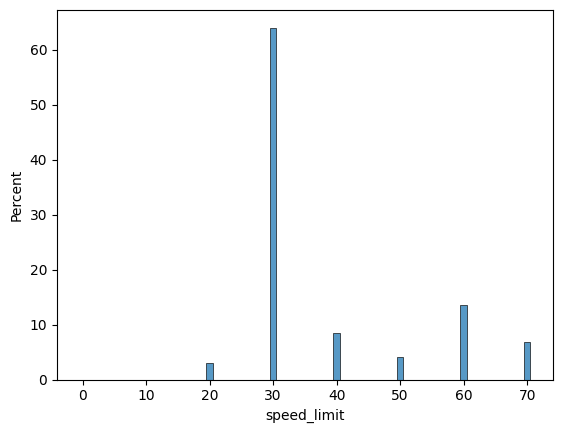

In [35]:
sns.histplot(accidents_df,x="speed_limit",stat="percent",discrete = True)

In [36]:
accidents_df["speed_limit"].value_counts()

30.0    89627
60.0    19081
40.0    11804
70.0     9626
50.0     5625
20.0     4290
10.0        2
0.0         1
Name: speed_limit, dtype: int64

#### Number of vehicles and casulaties

Here we use the Local Outlier Factor for the "number_of_vehicles" and the "number_of_casualties" column to detect the outliers based on their local density compare to their neighbors local density. The reason LOF is to find contextual outliers for example 30 casualties might be normal for 15 vehicles involved in the accident but it is an outlier for having 2 vehicles in the accident.

In [37]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
subX = accidents_df[['number_of_vehicles','number_of_casualties']]
X = subX.values
y_pred = clf.fit_predict(X)

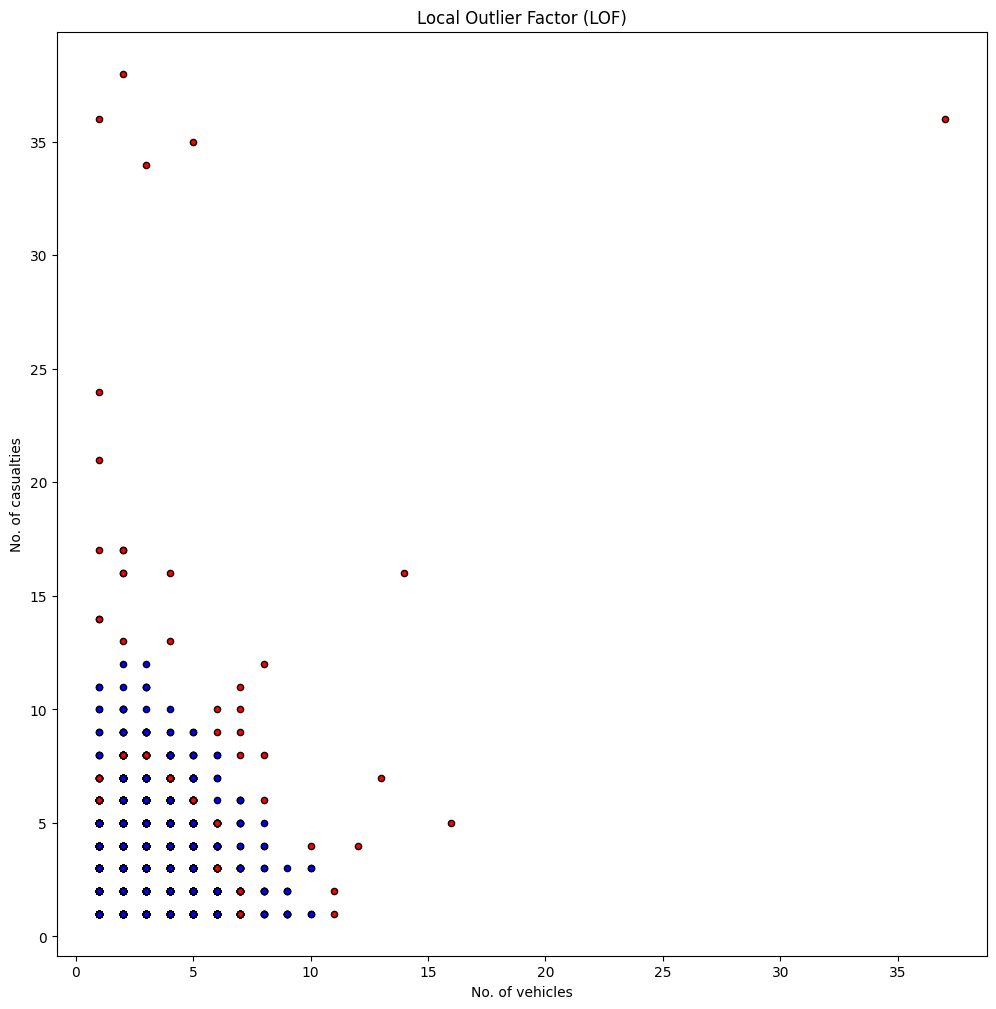

In [38]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 20)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 20)
plt.axis('tight')
plt.xlabel('No. of vehicles');
plt.ylabel('No. of casualties');
plt.show()

## Findings and conclusions

There are different types of missing data both MCAR and MAR. Some of the missing data didn't turn out to be missing and it was input-ed incorrectly like in the second road class. The missing data was written in different way and was some times left null.

There are no exact duplicate rows but there are rows that have information that is too similar to exist like same location and time.

We found 3 outliers in the speed limit column which are the rows that have the 0 and speed limits. The outliers that we found using the LOF and having a 20 neighbor threshold, are displayed in the scatter plot above they are through out a large range of values.

## Handling Duplicate data 

Here we are removing the duplicate data that was found based on location and time.

In [39]:
accidents_copy = accidents_df.copy()
print("Rows before handling duplicate data: "+str(accidents_copy.shape[0]))
subset_duplicates = ["longitude","latitude","date","time","day_of_week","location_easting_osgr", "location_northing_osgr"] 
accidents_copy.drop_duplicates(subset=subset_duplicates, inplace=True)
print("Rows after removing duplicates: "+str(accidents_copy.shape[0]))

Rows before handling duplicate data: 140056
Rows after removing duplicates: 140048


## Handling Missing data

### Location data

Since the Location data is missing in all of these columns and it would be inaccurate to impute, in addition there are only 27 missing rows, therefore we decided to drop these rows.

In [40]:
missing1 = accidents_copy.copy()
print("Rows before removing missing data location "+str(missing1.shape[0]))
missing1=missing1.dropna(subset=['location_easting_osgr','location_northing_osgr','longitude','latitude'])

print("Rows after removing missing data location "+str(missing1.shape[0]))


Rows before removing missing data location 140048
Rows after removing missing data location 140021


### Road Type

The Road type missing data was imputed using a multivariate relationship with the first road class and the road type, using the mode for each value of road class the missing data was filled.

In [41]:
missing4 = missing1.copy()
print("Number of missing values in the Road Type column: "+str(missing4['road_type'].isnull().sum()))
my=missing4.groupby(["first_road_class"])["road_type"].agg(pd.Series.mode)
missing4['road_type'] = missing4['road_type'].fillna(missing4['first_road_class'].map({'A':my[0],'A(M)': my[1], 'B':my[2],'C':my[3],'Motorway':my[4],'Unclassified':my[5]}))
print("Number of missing values after imputing: "+str(missing4['road_type'].isnull().sum()))


Number of missing values in the Road Type column: 806
Number of missing values after imputing: 0


### Junction and second road

In this section we are replacing the data that we found to be not missing, just entered incorrectly in the "junction_detail", "second road class" and "second_road_number" columns with values that would indicate they're not missing. Then dropping the rest of the missing values as they are only a few rows.

In [42]:
Junction = missing4.copy()
print("Number of rows missing in the junction detail column: "+str(Junction[Junction['junction_detail']=='Data missing or out of range']['junction_detail'].count()))
index_names = Junction[Junction['junction_detail'] == 'Data missing or out of range' ].index
Junction.drop(index_names, inplace = True)
print("Number of rows missing after dropping records: "+str(Junction[Junction['junction_detail']=='Data missing or out of range']['junction_detail'].count()))



Number of rows missing in the junction detail column: 1
Number of rows missing after dropping records: 0


In [43]:
Junction_road = Junction.copy()
print("Number of rows missing in the junction control column: "+str(Junction_road[Junction_road['junction_control']=='Data missing or out of range']['junction_control'].count()))
Junction_road.loc[Junction_road.junction_detail == 'Not at junction or within 20 metres', 'junction_control'] = 'No junction'
print("Number of rows missing in the junction control column after imputing: "+str(Junction_road[Junction_road['junction_control']=='Data missing or out of range']['junction_control'].count()))
index_names = Junction_road[ Junction_road['junction_control'] == 'Data missing or out of range' ].index
Junction_road.drop(index_names, inplace = True)
print("Number of rows missing in the junction control column after dropping records: "+str(Junction_road[Junction_road['junction_control']=='Data missing or out of range']['junction_control'].count()))



Number of rows missing in the junction control column: 56052
Number of rows missing in the junction control column after imputing: 143
Number of rows missing in the junction control column after dropping records: 0


In [44]:
Junction_road1 = Junction_road.copy()
print("Number of rows missing in the second road class column: "+str(Junction_road1[Junction_road1['second_road_class']=='-1']['second_road_class'].count()))
Junction_road1.loc[Junction_road1.junction_detail == 'Not at junction or within 20 metres', 'second_road_class'] = 'No second road'
print("Number of rows missing in the after imputing: "+str(Junction_road1[Junction_road1['second_road_class']=='-1']['second_road_class'].count()))
index_names = Junction_road1[ Junction_road1['second_road_class'] == '-1' ].index
Junction_road1.drop(index_names, inplace = True)
print("Number of rows missing in the after dropping: "+str(Junction_road1[Junction_road1['second_road_class']=='-1']['second_road_class'].count()))

Number of rows missing in the second road class column: 56526
Number of rows missing in the after imputing: 638
Number of rows missing in the after dropping: 0


In [45]:
Junction_road2 = Junction_road1.copy()
print("Number of rows missing in the second road number column: "+str(Junction_road2['second_road_number'].isna().sum()))
Junction_road2.loc[Junction_road2.junction_detail == 'Not at junction or within 20 metres', 'second_road_number'] = 'No second road'
print("Number of rows missing after imputing: "+str(Junction_road2['second_road_number'].isna().sum()))
index_names = Junction_road2[ Junction_road2['second_road_number'].isna()].index
Junction_road2.drop(index_names, inplace = True)
Junction_road2[Junction_road2['second_road_number'].isna()]
print("Number of rows missing after dropping: "+str(Junction_road2['second_road_number'].isna().sum()))

Number of rows missing in the second road number column: 55891
Number of rows missing after imputing: 3
Number of rows missing after dropping: 0


### Weather conditions

The Weather condition missing data was imputed using a multivariate relationship with the did_police_officer_attend_scene_of_accident column and the weather_condition column, using the mode for each value of police officer the missing data was filled.

In [46]:
missing2 = Junction_road2.copy()
print("Number of missing values: "+str(missing2['weather_conditions'].isnull().sum()))
msss=missing2.groupby(["did_police_officer_attend_scene_of_accident"])["weather_conditions"].agg(pd.Series.mode)
missing2['weather_conditions'] = missing2['weather_conditions'].fillna(missing2['did_police_officer_attend_scene_of_accident'].map({'Yes':msss[2], 'No': msss[1],'Data missing or out of range':msss[0],np.nan:msss[0]}))
print("Number of missing values after imputing: "+str(missing2['weather_conditions'].isnull().sum()))

Number of missing values: 2452
Number of missing values after imputing: 0


### Pedestrian crossing 

Here we are dealing with the missing values of the pedestrian crossing human control and physical facilities. Since the missing row is less than 2% of the rows we drop the rows with the missing data.

In [47]:
pedestrian = missing2.copy()
print("Number of missing rows in the pedestrian crossing human control column: "+str(pedestrian[pedestrian['pedestrian_crossing_human_control']=='Data missing or out of range']["pedestrian_crossing_human_control"].count()))
index_names = pedestrian[ pedestrian['pedestrian_crossing_human_control'] == 'Data missing or out of range' ].index
pedestrian.drop(index_names, inplace = True)
print("Number of missing after dropping: "+str(pedestrian[pedestrian['pedestrian_crossing_human_control']=='Data missing or out of range']["pedestrian_crossing_human_control"].count()))


Number of missing rows in the pedestrian crossing human control column: 119
Number of missing after dropping: 0


In [48]:
pedestrian1 = pedestrian.copy()
print("Number of missing rows in the pedestrian crossing physical facilities column: "+str(pedestrian1[pedestrian1['pedestrian_crossing_physical_facilities']=='Data missing or out of range']["pedestrian_crossing_physical_facilities"].count()))
index_names = pedestrian1[ pedestrian1['pedestrian_crossing_physical_facilities'] == 'Data missing or out of range' ].index
pedestrian1.drop(index_names, inplace = True)
pedestrian1[pedestrian1['pedestrian_crossing_physical_facilities']=='Data missing or out of range']
print("Number of missing rows after dropping: "+str(pedestrian1[pedestrian1['pedestrian_crossing_physical_facilities']=='Data missing or out of range']["pedestrian_crossing_physical_facilities"].count()))



Number of missing rows in the pedestrian crossing physical facilities column: 10
Number of missing rows after dropping: 0


### Road surface conditions

The Road conditions missing data was imputed using a multivariate relationship with the did_police_officer_attend_scene_of_accident column and the road_surface_conditions column, using the mode for each value of police officer column the missing data was filled.

In [49]:
missing3 = pedestrian1.copy()
print("Number of missing rows in the road surface conditions column: "+str(missing3[missing3['road_surface_conditions']=='Data missing or out of range']["road_surface_conditions"].count()))
missing3[missing3["road_surface_conditions"]=="Data missing or out of range"]["road_surface_conditions"].count()

ms4=missing3.groupby(["did_police_officer_attend_scene_of_accident"])["road_surface_conditions"].agg(pd.Series.mode)

missing3['road_surface_conditions'] = missing3.road_surface_conditions.replace('Data missing or out of range', np.nan, inplace=False)
missing3['road_surface_conditions'] = missing3['road_surface_conditions'].fillna(missing3['did_police_officer_attend_scene_of_accident'].map({'Yes':ms4[2], 'No': ms4[1],'Data missing or out of range':ms4[0],np.nan:ms4[0]}))
print("Number of missing rows after imputing: "+str(missing3[missing3['road_surface_conditions']=='Data missing or out of range']["road_surface_conditions"].count()))

Number of missing rows in the road surface conditions column: 226
Number of missing rows after imputing: 0


### Special conditions at site,  Carriageway hazard, did police officer attend scene of accident

For the "Special_conditions_at_site",  "carriage_hazards", "trunk_road_flag" and "did_police_office_attend_at_site" columns we are going to drop all the missing values since the number of missing rows is less than 2%.

In [50]:
special = missing3.copy()
print("Number of missing rows in the special conditions at site column: "+str(special[special['special_conditions_at_site']=='Data missing or out of range']["special_conditions_at_site"].count()))
index_names = special[ special['special_conditions_at_site'] == 'Data missing or out of range' ].index
special.drop(index_names, inplace = True)
print("Number of missing rows after dropping: "+str(special[special['special_conditions_at_site']=='Data missing or out of range']["special_conditions_at_site"].count()))


Number of missing rows in the special conditions at site column: 23
Number of missing rows after dropping: 0


In [51]:
carriage = special.copy()
print("Number of missing rows in the Carriageway hazards column: "+str(carriage[carriage['carriageway_hazards']=='Data missing or out of range']["carriageway_hazards"].count()))
index_names = carriage[ carriage['carriageway_hazards'] == 'Data missing or out of range' ].index
carriage.drop(index_names, inplace = True)
print("Number of missing rows after dropping: "+str(carriage[carriage['carriageway_hazards']=='Data missing or out of range']["carriageway_hazards"].count()))


Number of missing rows in the Carriageway hazards column: 7
Number of missing rows after dropping: 0


In [52]:
police = carriage.copy()
print("Number of missing rows in the Police attended column: "+str(police[police['did_police_officer_attend_scene_of_accident']=='Data missing or out of range']["did_police_officer_attend_scene_of_accident"].count()))
index_names = police[ police['did_police_officer_attend_scene_of_accident'] == 'Data missing or out of range' ].index
police.drop(index_names, inplace = True)
print("Number of missing rows after dropping: "+str(police[police['did_police_officer_attend_scene_of_accident']=='Data missing or out of range']["did_police_officer_attend_scene_of_accident"].count()))


Number of missing rows in the Police attended column: 8
Number of missing rows after dropping: 0


### Trunk road flag

For the trunk road flag column we are imputing the missing values using the mode value of the column, since most of the data set is non trunk its safer to assume the missing values are non trunk as well.

In [53]:
trunk = police.copy()
print("Number of missing rows in the Trunk road column: "+str(trunk[trunk['trunk_road_flag']=='Data missing or out of range']["trunk_road_flag"].count()))

mod=trunk.loc[:,"trunk_road_flag"].mode()
trunk.loc[trunk["trunk_road_flag"] == "Data missing or out of range", "trunk_road_flag"] = mod.get(0)
print("Number of missing rows after imputing: "+str(trunk[trunk['trunk_road_flag']=='Data missing or out of range']["trunk_road_flag"].count()))



Number of missing rows in the Trunk road column: 13834
Number of missing rows after imputing: 0


### Lsoa of accident

Since the Lsoa of accident is a location column we can we tried to impute its values using a multivariate relationship for the mode of the local_authority_district column, but since some districts only contain -1 or missing values, therefore we imputed the using arbitrary values as the rows were too many to drop.

In [54]:
lsoa = police.copy()
print('Number of total districts')
len(lsoa['local_authority_district'].unique())

Number of total districts


380

In [55]:

lsoa1=lsoa[lsoa['lsoa_of_accident_location']!='-1']
print('Number of districts with mods that do not have missing values')
lsoa1.groupby('local_authority_district')['lsoa_of_accident_location'].agg(lambda x: pd.Series.mode(x).iat[0]).count()

Number of districts with mods that do not have missing values


348

In [56]:
lsoa.lsoa_of_accident_location.replace('-1', np.nan, inplace=True)
print("Number of missing data before imputing: "+str(lsoa['lsoa_of_accident_location'].isnull().sum()))
lsoa["lsoa_of_accident_location"].fillna(lambda x: random.choice(lsoa[lsoa[lsoa_of_accident_location] != np.nan]["lsoa_of_accident_location"]), inplace =True)
print("Number of missing data before imputing: "+str(lsoa['lsoa_of_accident_location'].isnull().sum()))

Number of missing data before imputing: 8710
Number of missing data before imputing: 0


## Handling outliers

### Removing Speed Limit outliers

In [57]:
accidents_df_copy = lsoa.copy()
print("Rows before removing outliers "+str(accidents_df_copy.shape[0]))
threshold_perc = 1
speed_limit_count = accidents_df_copy["speed_limit"].count()
threshold = (threshold_perc/100) * speed_limit_count
value_counts = accidents_df_copy["speed_limit"].value_counts()
to_remove = value_counts[value_counts <= threshold].index
accidents_df_copy["speed_limit"].replace(to_remove, np.nan, inplace=True)
accidents_df_copy.dropna(0,subset=["speed_limit"], inplace=True)
print("Rows after removing outliers "+str(accidents_df_copy.shape[0]))


Rows before removing outliers 139069
Rows after removing outliers 139066


### Removing Number of vehicles and casualties outliers

In [58]:
acc_cop=accidents_df_copy.copy()
print("Rows before removing outliers "+str(acc_cop.shape[0]))
for x in range(len(X[out_mask,0])):
    acc_cop=acc_cop.loc[~((acc_cop.number_of_vehicles == X[out_mask,1][x]) & (acc_cop.number_of_casualties == X[out_mask,0][x]))]
print("Rows after removing outliers "+str(acc_cop.shape[0]))

Rows before removing outliers 139066
Rows after removing outliers 138819


## Findings and conclusions

There were few outlier rows from both outlier detection methods, and since they are not more than 2% of the data set they were dropped.

# 4 - Data transformation

## 4.1 - Discretization

Here the column datetime is discretized to Week number which represents the number of the week in the year.

In [59]:
accidents_df_copy = acc_cop.copy()
accidents_df_copy["date"] = accidents_df_copy["date"].astype("datetime64[ns]")
accidents_df_copy["Week number"] = accidents_df_copy["date"].dt.isocalendar().week
accidents_df_copy[["date","Week number"]]

,date,Week number
accident_index,,
201501BS70001,2015-01-12,3
201501BS70002,2015-01-12,3
201501BS70004,2015-01-12,3
201501BS70005,2015-01-13,3
201501BS70008,2015-01-09,2
...,...,...
2015984139115,2015-12-11,50
2015984139715,2015-12-02,49
2015984140215,2015-12-23,52


## 4.11 - Findings and conclusions

The numbers of accidents per each week is almost the same thus accidents are relatively distributed over the weeks of the year

## 4.2 - Encoding

We encoded the columns we believed it needed encoding , accident_severity, first_road_class, second_road_class as they are ordinal experienced label encoding. 

In [60]:
cleanup_nums = {"accident_severity":{"Slight": 0, "Serious": 1, "Fatal": 2},"urban_or_rural_area":{"Urban": 1, "Rural": 0}, "did_police_officer_attend_scene_of_accident":{"Yes": 1, "No": 0}, "trunk_road_flag":{"Non-trunk":0, "Trunk":1},"first_road_class":{"Unclassified": 0, "C": 1, "B": 2, "A": 3, "A(M)": 4,"Motorway":5 }, "second_road_class":{"Unclassified": 0, "C": 1, "B": 2, "A": 3, "A(M)": 4,"Motorway":5 } }

encoded_df = accidents_df_copy.replace(cleanup_nums)
encoded_df

,Unnamed: 0,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number
accident_index,,,,,,,,,,,,,,,,,,,,,
201501BS70001,0,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,0,1,...,Darkness - lights lit,Fine no high winds,Dry,None,None,1,1,0,E01002825,3
201501BS70002,1,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,0,1,...,Daylight,Fine no high winds,Dry,None,None,1,1,0,E01002820,3
201501BS70004,2,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,0,1,...,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,1,1,0,E01002833,3
201501BS70005,3,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,0,1,...,Daylight,Fine no high winds,Wet or damp,None,None,1,0,0,E01002874,3
201501BS70008,4,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,1,2,...,Daylight,Raining no high winds,Wet or damp,None,None,1,0,0,E01002814,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,140051,2015,984139115,312087.0,570791.0,-3.376671,55.023855,Dumfries and Galloway,0,3,...,Daylight,Fine no high winds,Wet or damp,None,None,0,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,50
2015984139715,140052,2015,984139715,320671.0,569791.0,-3.242159,55.016316,Dumfries and Galloway,0,2,...,Daylight,Fine no high winds,Wet or damp,None,None,0,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,49
2015984140215,140053,2015,984140215,311731.0,586343.0,-3.387067,55.163502,Dumfries and Galloway,1,1,...,Darkness - no lighting,Fine + high winds,Wet or damp,None,None,0,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,52


light conditions experienced one hot encoding as they are not ordinal thus label encoding will not work with them.

In [61]:
accidents_df1=encoded_df.copy()

one_hot3 = pd.get_dummies(accidents_df1['light_conditions'])
# Drop column as it is now encoded
accidents_df1 = accidents_df1.drop('light_conditions',axis = 1)
# Join the encoded df
accidents_df1 = accidents_df1.join(one_hot3)

## 4.22 - Findings and conlcusions

We could've hot encoded more columns but we feared that it might increase the number of columns drastically which might affect its performance

## 4.3 - Normalisation 

After careful consideration, we have decided that we should not normalize any attribute. Firstly, even though the speed limit attribute might appear numerical, after consultation with Dr. Mervat, we figured out that it is, in its essence, categorical, so no normalization is valid here. For number of casulaties and number of vehicles, they are the only numerical attributes, and they both have a very similar range anyway and their ranges are relatively small, so there is no danger of skewness when feeding this dataset to a model. excluding these three columns, there are no other values eligible to be normalized. For reference, we implemented some methods of normalization for number of casualties and number of vehicles, but we did not apply it to our dataset.

1.0000000000000002

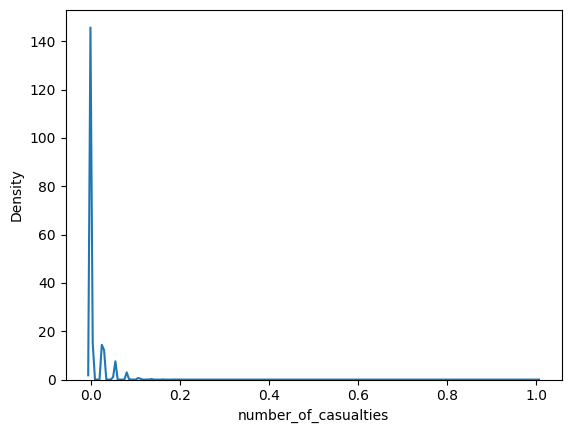

In [62]:
accidents_copy = accidents_df1.copy()
casualties_min_max = MinMaxScaler().fit_transform(accidents_copy[["number_of_casualties"]])
accidents_copy["number_of_casualties"] = casualties_min_max.flatten().tolist()
accidents_copy["number_of_casualties"] = accidents_copy["number_of_casualties"]
sns.kdeplot(accidents_copy["number_of_casualties"])
casualties_min_max.max()

<AxesSubplot: xlabel='number_of_casualties', ylabel='Density'>

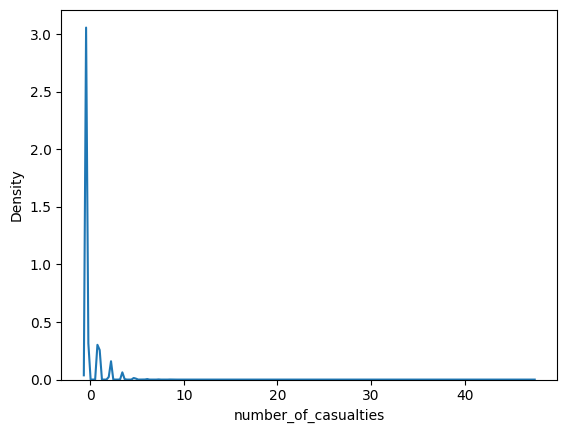

In [67]:
accidents_copy = accidents_df1.copy()
casualties_z_scaled = StandardScaler().fit_transform(accidents_copy[["number_of_casualties"]])
accidents_copy["number_of_casualties"] = casualties_z_scaled.flatten().tolist()
sns.kdeplot(accidents_copy["number_of_casualties"])

<AxesSubplot: xlabel='number_of_vehicles', ylabel='Density'>

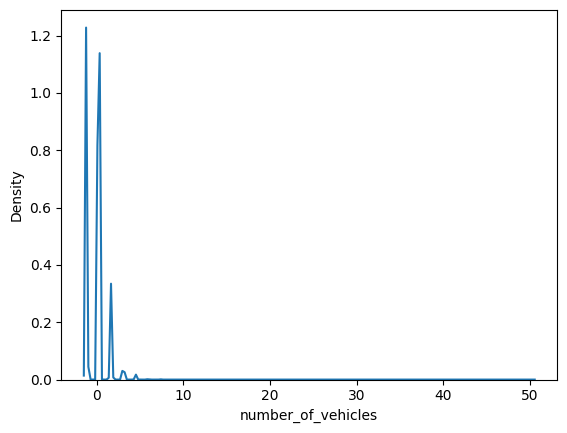

In [64]:
accidents_copy = accidents_df1.copy()
vehicles_z_scaled = StandardScaler().fit_transform(accidents_copy[["number_of_vehicles"]])
accidents_copy["number_of_vehicles"] = vehicles_z_scaled.flatten().tolist()
sns.kdeplot(accidents_copy["number_of_vehicles"])

## 4.31 - Findings and conclusions

We can see that after applying z-score for both, the range has increased, this can be possibly due to the data being positively skewed. When applying min-max, we see that most values lie within the first few unit values while fewer values take up the rest of the range up to 1. This is due to the range being split into equal unit values.

## 4.4 - Adding more columns

### Adding season
we added a season column. and a column for whether both first and second roads are classified or not. note that we need to change the categorical values into the label names when we combine the dataframes

In [65]:
copy_df = accidents_df1.copy()
copy_df.loc[~((copy_df["first_road_class"] == "Unclassified") & (copy_df["second_road_class"] == "Unclassified")) ,"Are_first_and_second_roads_both_classified"] = 1
copy_df.loc[(copy_df["first_road_class"] == "Unclassified") & (copy_df["second_road_class"] == "Unclassified") ,"Are_first_and_second_roads_both_classified"] = 0
copy_df["Are_first_and_second_roads_both_classified"] = copy_df["Are_first_and_second_roads_both_classified"].astype(int)
copy_df

,Unnamed: 0,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Are_first_and_second_roads_both_classified
accident_index,,,,,,,,,,,,,,,,,,,,,
201501BS70001,0,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,0,1,...,1,0,E01002825,3,0,1,0,0,0,1
201501BS70002,1,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,0,1,...,1,0,E01002820,3,0,0,0,0,1,1
201501BS70004,2,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,0,1,...,1,0,E01002833,3,0,1,0,0,0,1
201501BS70005,3,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,0,1,...,0,0,E01002874,3,0,0,0,0,1,1
201501BS70008,4,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,1,2,...,0,0,E01002814,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,140051,2015,984139115,312087.0,570791.0,-3.376671,55.023855,Dumfries and Galloway,0,3,...,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,50,0,0,0,0,1,1
2015984139715,140052,2015,984139715,320671.0,569791.0,-3.242159,55.016316,Dumfries and Galloway,0,2,...,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,49,0,0,0,0,1,1
2015984140215,140053,2015,984140215,311731.0,586343.0,-3.387067,55.163502,Dumfries and Galloway,1,1,...,1,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,52,0,0,0,1,0,1


In [66]:
copy_df = copy_df.copy()
copy_df["date"] = pd.to_datetime(copy_df["date"]) # this should be removed when combining dataframes
copy_df.loc[(copy_df["date"].dt.month >= 6) & (copy_df["date"].dt.month<=8),"is_summer_season"] = 1
copy_df.loc[~((copy_df["date"].dt.month >= 6) & (copy_df["date"].dt.month<=8)),"is_summer_season"] = 0
copy_df["is_summer_season"] = copy_df["is_summer_season"].astype(int)
copy_df

,Unnamed: 0,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,trunk_road_flag,lsoa_of_accident_location,Week number,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Are_first_and_second_roads_both_classified,is_summer_season
accident_index,,,,,,,,,,,,,,,,,,,,,
201501BS70001,0,2015,01BS70001,525130.0,180050.0,-0.198465,51.505538,Metropolitan Police,0,1,...,0,E01002825,3,0,1,0,0,0,1,0
201501BS70002,1,2015,01BS70002,526530.0,178560.0,-0.178838,51.491836,Metropolitan Police,0,1,...,0,E01002820,3,0,0,0,0,1,1,0
201501BS70004,2,2015,01BS70004,524610.0,181080.0,-0.205590,51.514910,Metropolitan Police,0,1,...,0,E01002833,3,0,1,0,0,0,1,0
201501BS70005,3,2015,01BS70005,524420.0,181080.0,-0.208327,51.514952,Metropolitan Police,0,1,...,0,E01002874,3,0,0,0,0,1,1,0
201501BS70008,4,2015,01BS70008,524630.0,179040.0,-0.206022,51.496572,Metropolitan Police,1,2,...,0,E01002814,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,140051,2015,984139115,312087.0,570791.0,-3.376671,55.023855,Dumfries and Galloway,0,3,...,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,50,0,0,0,0,1,1,0
2015984139715,140052,2015,984139715,320671.0,569791.0,-3.242159,55.016316,Dumfries and Galloway,0,2,...,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,49,0,0,0,0,1,1,0
2015984140215,140053,2015,984140215,311731.0,586343.0,-3.387067,55.163502,Dumfries and Galloway,1,1,...,Data missing or out of range,<function <lambda> at 0x7f1e5345d790>,52,0,0,0,1,0,1,0


### Changing unclassified row number values

Since some of the unclassified data in the first road number and second road number columns are entered as a string indicating they're unclassified we changed these string values to an integer -1 to indicate an unclassified road.

In [68]:
copy_df6=copy_df
copy_df6.second_road_number.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', '-1', inplace=True)
copy_df6.first_road_number.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', '-1', inplace=True)


## 4.41 - Findings and concluisons

We can see that the a lot of information/attributes can be gathered from the date and road classes. We could additionally discretize the dates into seasons, or see how many accidents happened around midnight.

## 4.5 - Csv file for lookup

In [69]:
lookup_dict = {"accident_severity":{"Slight": 0, "Serious": 1, "Fatal": 2},"urban_or_rural_area":{"Urban": 1, "Rural": 0}, "did_police_officer_attend_scene_of_accident":{"Yes": 1, "No": 0}, "trunk_road_flag":{"Non-trunk":0, "Trunk":1},"first_road_class":{"Unclassified": 0, "C": 1, "B": 2, "A": 3, "A(M)": 4,"Motorway":5 }, "second_road_class":{"Unclassified": 0, "C": 1, "B": 2, "A": 3, "A(M)": 4,"Motorway":5 },"first_road_number":{'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ':-1},"second_road_number":{'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ':-1} }

lookup_df = pd.DataFrame.from_dict(lookup_dict)

lookup_df.to_csv("lookup.csv")

## 5- Exporting the dataframe to a csv file or parquet

In [77]:

copy_df6.to_csv('output_dataset.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d8ab68e-25eb-42a3-8db0-874358d099bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>